In [ ]:
pip install impyute

In [ ]:
pip install missingno

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 데이터 변수 설명
'''

age : 나이
workclass : 일 유형
fnlwgt : CPS(Current Population Survey) 가중치
education : 교육수준
education.num : 교육수준 번호
marital.status : 결혼 상태
occupation : 직업
relationship : 가족관계
race : 인종
sex : 성별
capital.gain : 자본 이익
capital.loss : 자본 손실
hours.per.week : 주당 근무시간
native.country : 본 국적
target : 소득
					   0 = <=50K (5만 달러 이하)

					   1 = >50K (5만 달러 초과)
'''
print()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train_data_original = pd.read_csv('/content/drive/MyDrive/DSCOVER/2학기 가이드 프로젝트/train_data_수정.csv')
train_data_original.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,41,Private,170230,Bachelors,13,Divorced,Exec-managerial,Unmarried,White,Female,0,0,45,United-States,0
1,20,Private,435469,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,40,Mexico,0
2,73,Private,29778,HS-grad,9,Widowed,Other-service,Not-in-family,White,Female,0,0,37,United-States,0
3,56,Self-emp-inc,105582,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,7688,0,50,United-States,1
4,53,Private,167065,11th,7,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,0


In [ ]:
test_data = pd.read_csv('/content/drive/MyDrive/DSCOVER/2학기 가이드 프로젝트/test_data_수정.csv')
test_data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,45,Federal-gov,207107,Assoc-acdm,12,Divorced,Adm-clerical,Unmarried,Asian-Pac-Islander,Male,0,2080,40,Philippines,0
1,22,Self-emp-not-inc,197387,HS-grad,9,Never-married,Farming-fishing,Own-child,White,Male,0,0,40,United-States,0
2,39,Private,111268,Bachelors,13,Never-married,Adm-clerical,Own-child,White,Female,0,0,40,United-States,0
3,35,Private,98283,Prof-school,15,Never-married,Prof-specialty,Not-in-family,Asian-Pac-Islander,Male,0,0,40,India,1
4,40,Private,224232,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,1


## 결측치 처리
- 다중대치법 활용하여 workclass, occupation 결측치 처리


In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LogisticRegression
from impyute.imputation.cs import mice
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew

In [ ]:
# 두 데이터 프레임 형태를 같게 한 후 train, test 로 concat
total = pd.concat([train_data_original, test_data],axis=0, ignore_index = True)
total.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,41,Private,170230,Bachelors,13,Divorced,Exec-managerial,Unmarried,White,Female,0,0,45,United-States,0
1,20,Private,435469,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,40,Mexico,0
2,73,Private,29778,HS-grad,9,Widowed,Other-service,Not-in-family,White,Female,0,0,37,United-States,0
3,56,Self-emp-inc,105582,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,7688,0,50,United-States,1
4,53,Private,167065,11th,7,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,0


<Axes: >

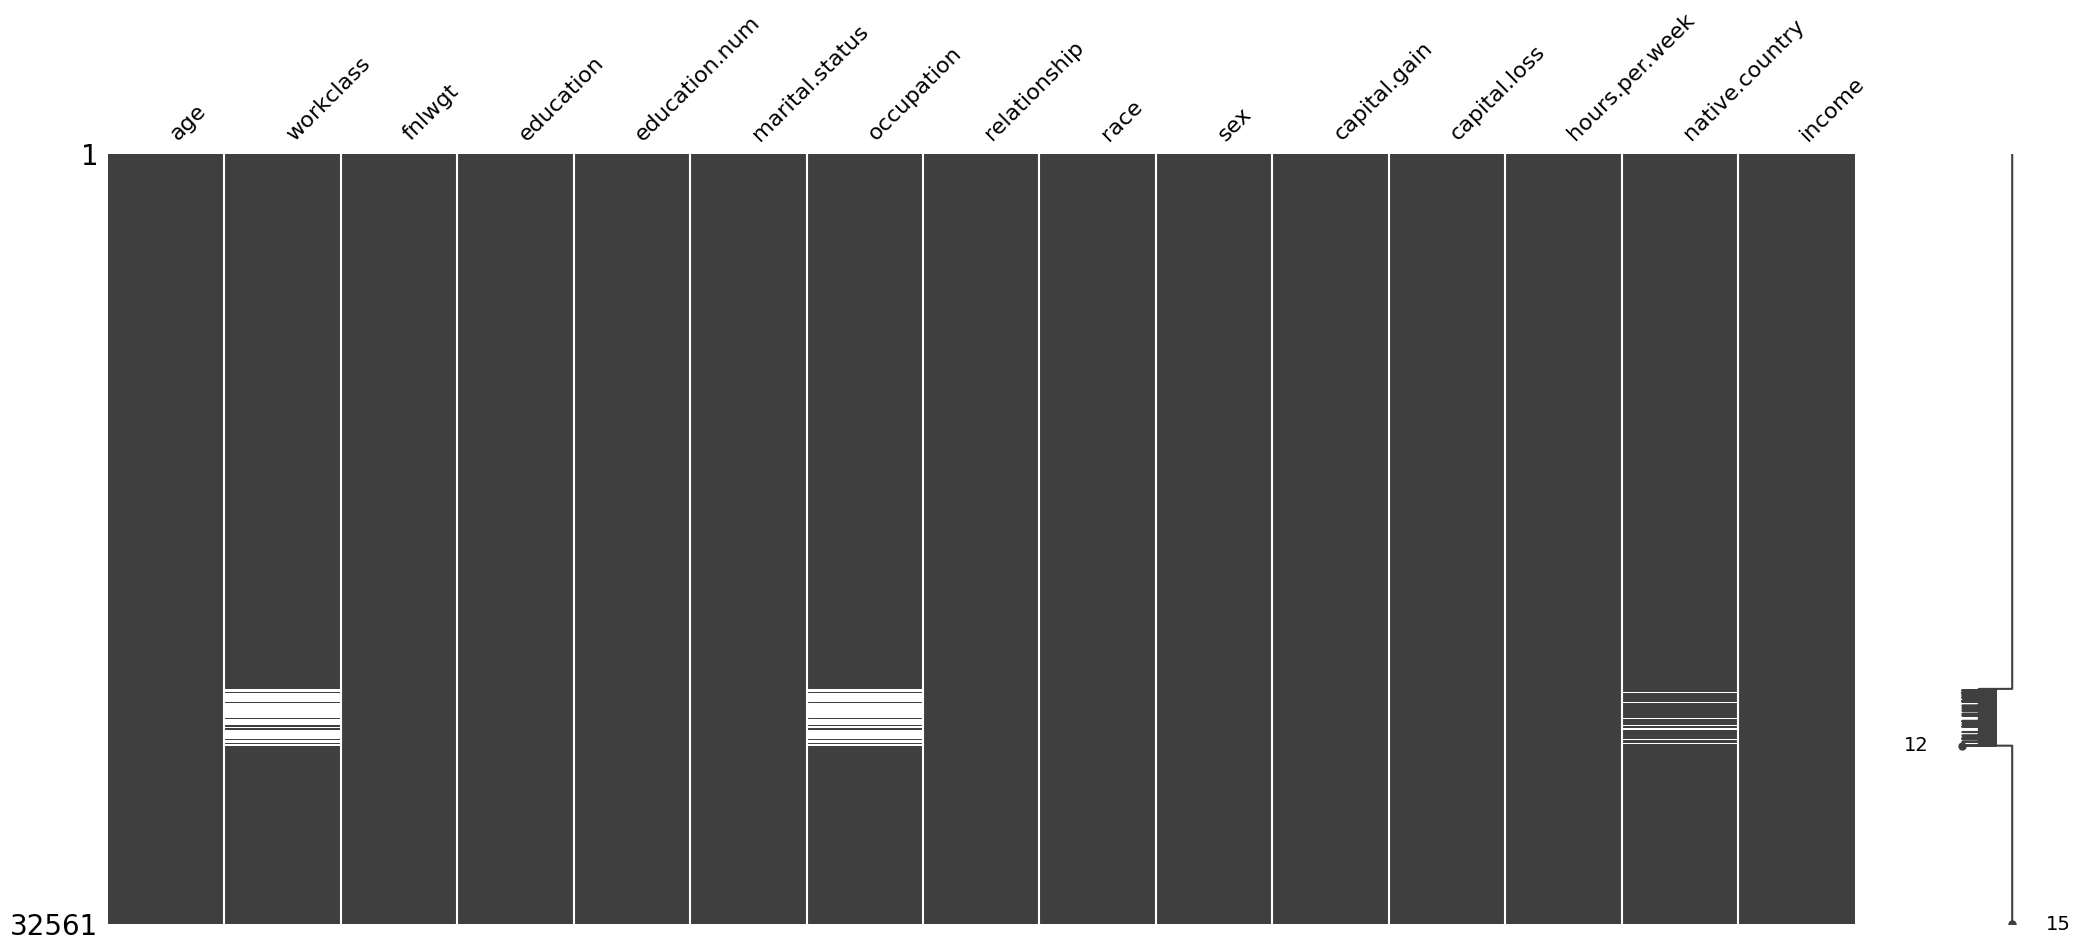

In [ ]:
# 결측치 확인
import missingno as msno
msno.matrix(total)

In [ ]:
# native.country 결측치는 'Unknown'으로 대체
total['native.country'].fillna('Unknown', inplace=True)

<ipython-input-40-24940cc22fbc>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  total['native.country'].fillna('Unknown', inplace=True)


In [ ]:
# 범주형 변수 인코딩
dummy = pd.get_dummies(total)
dummy.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Unknown,native.country_Vietnam,native.country_Yugoslavia
0,41,170230,13,0,0,45,0,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,20,435469,9,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,73,29778,9,0,0,37,0,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,56,105582,10,7688,0,50,1,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,53,167065,7,0,0,40,0,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [ ]:
# 결측치 대체
total_impute = pd.DataFrame(IterativeImputer(verbose = False).fit_transform(dummy))
total_impute.head()

,0,1,2,3,4,5,6,7,8,9,...,97,98,99,100,101,102,103,104,105,106
0,41.0,170230.0,13.0,0.0,0.0,45.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,20.0,435469.0,9.0,0.0,0.0,40.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,73.0,29778.0,9.0,0.0,0.0,37.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,56.0,105582.0,10.0,7688.0,0.0,50.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,53.0,167065.0,7.0,0.0,0.0,40.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


<Axes: >

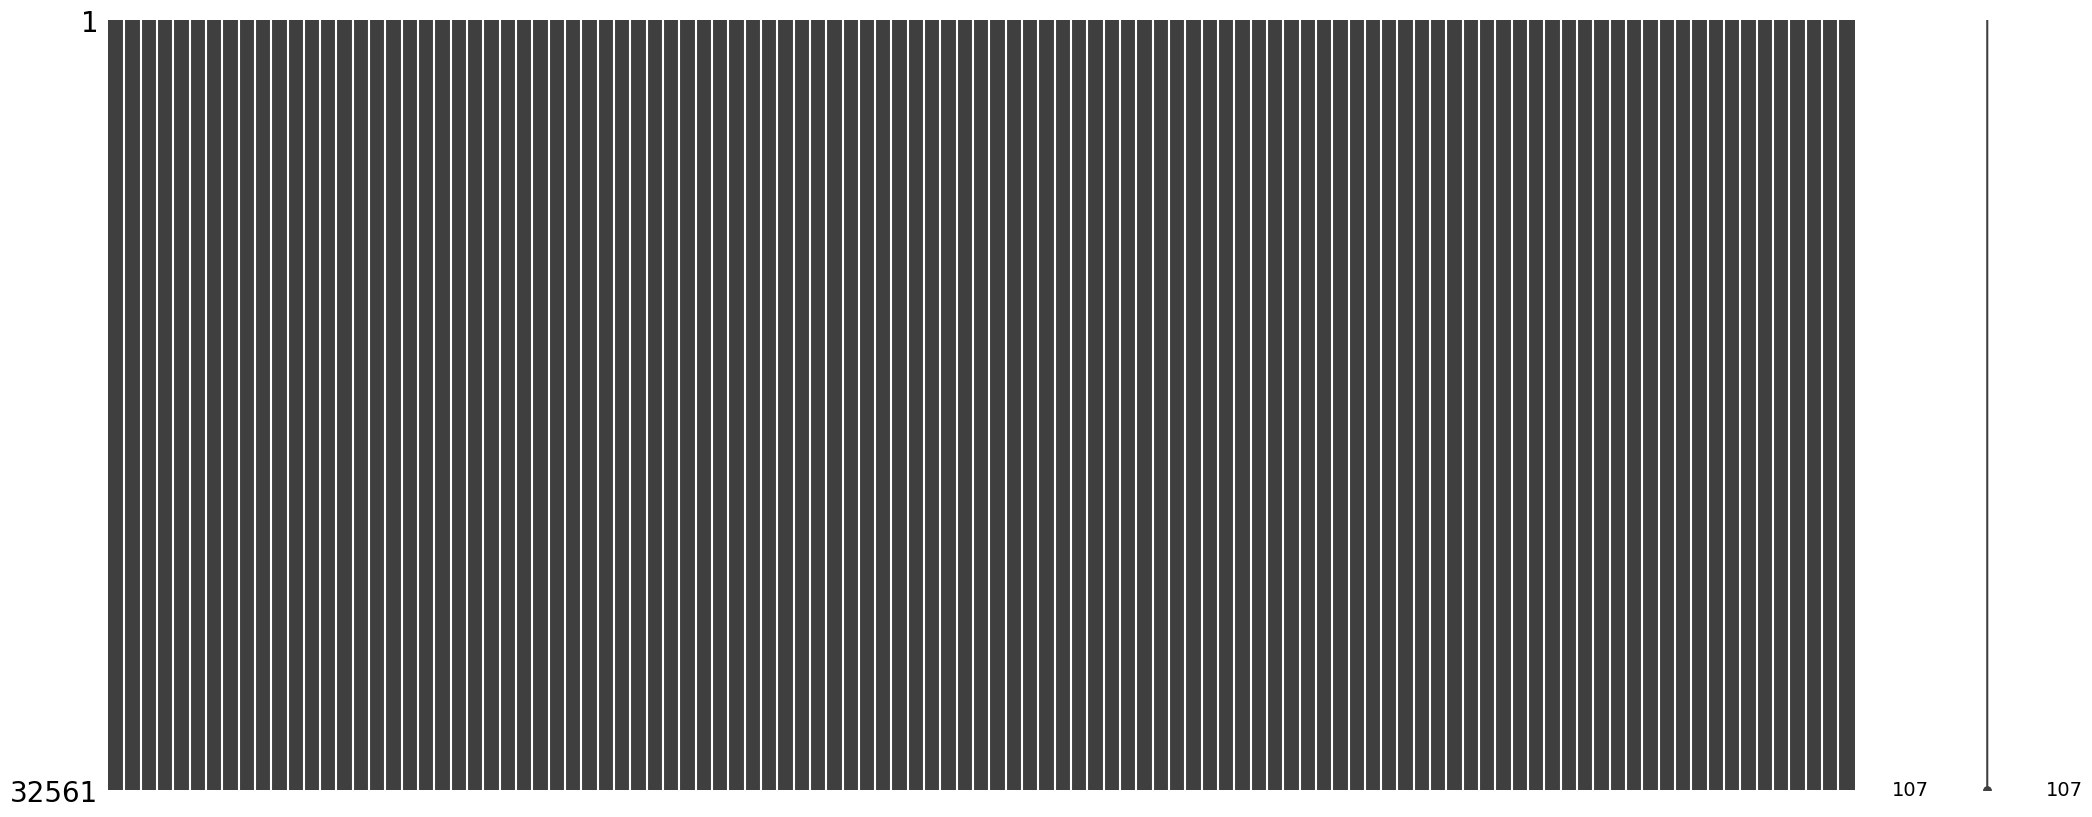

In [ ]:
# 결측치 처리된 것 확인
msno.matrix(total_impute)

In [ ]:
# 범주형 변수 다시 범주형으로 되돌리기
total_cols = list(dummy.columns)
total_impute.columns = total_cols

for col_prefix in total_impute.columns.str.extract(r'([^_]+)_')[0].dropna().unique():
    cols = [col for col in total_impute.columns if col.startswith(col_prefix + '_')]

    if len(cols) > 0:
        total_impute[col_prefix] = total_impute[cols].idxmax(axis=1).str.replace(col_prefix + '_', '')
        total_impute.drop(cols, axis=1, inplace=True)

total_impute.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income,workclass,education,marital.status,occupation,relationship,race,sex,native.country
0,41.0,170230.0,13.0,0.0,0.0,45.0,0.0,Private,Bachelors,Divorced,Exec-managerial,Unmarried,White,Female,United-States
1,20.0,435469.0,9.0,0.0,0.0,40.0,0.0,Private,HS-grad,Never-married,Other-service,Own-child,White,Female,Mexico
2,73.0,29778.0,9.0,0.0,0.0,37.0,0.0,Private,HS-grad,Widowed,Other-service,Not-in-family,White,Female,United-States
3,56.0,105582.0,10.0,7688.0,0.0,50.0,1.0,Self-emp-inc,Some-college,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
4,53.0,167065.0,7.0,0.0,0.0,40.0,0.0,Private,11th,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States


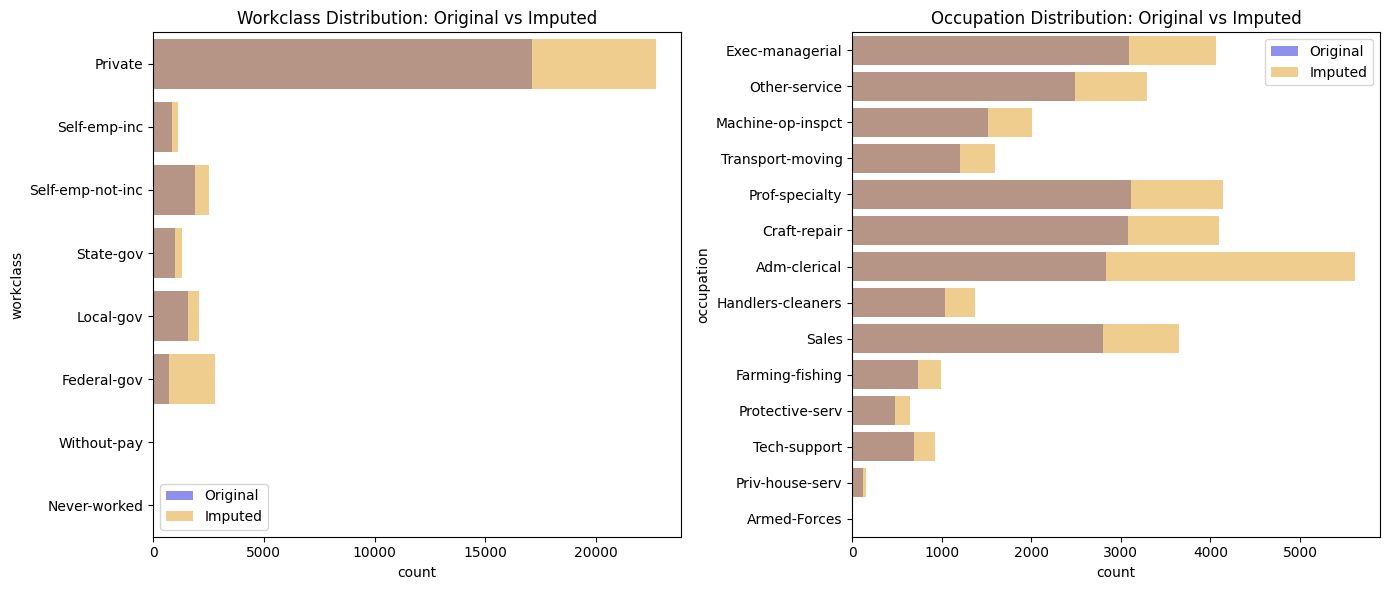

In [ ]:
# 결측치 처리 시각화
original_workclass = train_data_original['workclass']
original_occupation = train_data_original['occupation']

imputed_workclass = total_impute['workclass']
imputed_occupation = total_impute['occupation']

plt.figure(figsize=(14, 6))

# Workclass 분포 비교
plt.subplot(1, 2, 1)
sns.countplot(y=original_workclass, alpha=0.5, label='Original', color='blue')
sns.countplot(y=imputed_workclass, alpha=0.5, label='Imputed', color='orange')
plt.title('Workclass Distribution: Original vs Imputed')
plt.legend()

# Occupation 분포 비교
plt.subplot(1, 2, 2)
sns.countplot(y=original_occupation, alpha=0.5, label='Original', color='blue')
sns.countplot(y=imputed_occupation, alpha=0.5, label='Imputed', color='orange')
plt.title('Occupation Distribution: Original vs Imputed')
plt.legend()

plt.tight_layout()
plt.show()

## Relationship, Martial.status 범주 정리

In [ ]:
# [Marital.status] 'Married-civ-spouse'와 'Married-AF-spouse'를 'Now Married'로 변경
total_impute.loc[total_impute['marital.status'] == 'Married-civ-spouse', 'marital.status'] = 'Now Married'
total_impute.loc[total_impute['marital.status'] == 'Married-AF-spouse', 'marital.status'] = 'Now Married'

# [Marital.status] 'Married-spouse-absent'를 'Separated'로 변경
total_impute.loc[total_impute['marital.status'] == 'Married-spouse-absent', 'marital.status'] = 'Separated'

# [relationship] 단순화
total_impute.loc[total_impute['relationship'] == 'Husband', 'relationship'] = 'Spouse (No kid)'
total_impute.loc[total_impute['relationship'] == 'Wife', 'relationship'] = 'Spouse (No kid)'
total_impute.loc[total_impute['relationship'] == 'Own-child', 'relationship'] = 'Spouse (Yes kid)'
total_impute.loc[total_impute['relationship'] == 'Not-in-family', 'relationship'] = 'Unmarried'

## column drop: education, fnlwgt

In [ ]:
total_impute.drop(['education', 'fnlwgt'], axis=1, inplace=True)

## education.num 변수 재범주화
- education.num별 income이 1인 비율에 따라 재범주화
- 기존 13개에서 5개로

In [ ]:
def education_num_org(row):
    if row['education.num'] <= 8:
        return 1
    elif row['education.num'] <= 12:
        return 2
    elif row['education.num'] == 13:
        return 3
    elif row['education.num'] == 14:
        return 4
    elif row['education.num'] >= 15:
        return 5

# 새로운 열 'education.num_prep' 추가
total_impute['education.num_prep'] = total_impute.apply(education_num_org, axis=1)
total_impute.drop('education.num',axis=1,inplace=True)

# 결과 확인
total_impute.head()

,age,capital.gain,capital.loss,hours.per.week,income,workclass,marital.status,occupation,relationship,race,sex,native.country,education.num_prep
0,41.0,0.0,0.0,45.0,0.0,Private,Divorced,Exec-managerial,Unmarried,White,Female,United-States,3
1,20.0,0.0,0.0,40.0,0.0,Private,Never-married,Other-service,Spouse (Yes kid),White,Female,Mexico,2
2,73.0,0.0,0.0,37.0,0.0,Private,Widowed,Other-service,Unmarried,White,Female,United-States,2
3,56.0,7688.0,0.0,50.0,1.0,Self-emp-inc,Now Married,Exec-managerial,Spouse (No kid),White,Male,United-States,2
4,53.0,0.0,0.0,40.0,0.0,Private,Now Married,Machine-op-inspct,Spouse (No kid),White,Male,United-States,1


In [ ]:
train_df = total_impute.iloc[:len(train_data_original)]
test_df = total_impute.iloc[len(train_data_original):]

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25020 entries, 0 to 25019
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 25020 non-null  float64
 1   capital.gain        25020 non-null  float64
 2   capital.loss        25020 non-null  float64
 3   hours.per.week      25020 non-null  float64
 4   income              25020 non-null  float64
 5   workclass           25020 non-null  object 
 6   marital.status      25020 non-null  object 
 7   occupation          25020 non-null  object 
 8   relationship        25020 non-null  object 
 9   race                25020 non-null  object 
 10  sex                 25020 non-null  object 
 11  native.country      25020 non-null  object 
 12  education.num_prep  25020 non-null  int64  
dtypes: float64(5), int64(1), object(7)
memory usage: 2.5+ MB


In [ ]:
train_df.isnull().sum()

,0
age,0
capital.gain,0
capital.loss,0
hours.per.week,0
income,0
workclass,0
marital.status,0
occupation,0
relationship,0
race,0


In [ ]:
# 범주형 변수만 추출 (object 타입)
categorical_cols = train_df.select_dtypes(include=['object']).columns

# 결과를 저장할 딕셔너리
unique_value_info = {}

# 각 범주형 변수별로 유니크한 값과 그 비율 계산
for col in categorical_cols:
    total_count = len(train_df[col])
    unique_values = train_df[col].value_counts()  # 각 값의 개수
    unique_ratios = unique_values / total_count  # 각 값의 비율

    # 결과를 저장 (유니크한 값과 그 비율)
    unique_value_info[col] = pd.DataFrame({
        'Value': unique_values.index,
        'Count': unique_values.values,
        'Ratio': unique_ratios.values
    })

    print(f"\n범주형 변수 '{col}'의 유니크 값과 비율:")
    print(unique_value_info[col])


범주형 변수 'workclass'의 유니크 값과 비율:
              Value  Count     Ratio
0           Private  17103  0.683573
1       Federal-gov   2561  0.102358
2  Self-emp-not-inc   1892  0.075620
3         Local-gov   1594  0.063709
4         State-gov    984  0.039329
5      Self-emp-inc    869  0.034732
6       Without-pay     10  0.000400
7      Never-worked      7  0.000280

범주형 변수 'marital.status'의 유니크 값과 비율:
           Value  Count     Ratio
0    Now Married  11438  0.457154
1  Never-married   8242  0.329416
2       Divorced   3429  0.137050
3      Separated   1123  0.044884
4        Widowed    788  0.031495

범주형 변수 'occupation'의 유니크 값과 비율:
                Value  Count     Ratio
0        Adm-clerical   4672  0.186731
1      Prof-specialty   3115  0.124500
2     Exec-managerial   3090  0.123501
3        Craft-repair   3084  0.123261
4               Sales   2798  0.111831
5       Other-service   2489  0.099480
6   Machine-op-inspct   1510  0.060352
7    Transport-moving   1197  0.047842
8   Handle

In [ ]:
train_df.head()

,age,capital.gain,capital.loss,hours.per.week,income,workclass,marital.status,occupation,relationship,race,sex,native.country,education.num_prep
0,41.0,0.0,0.0,45.0,0.0,Private,Divorced,Exec-managerial,Unmarried,White,Female,United-States,3
1,20.0,0.0,0.0,40.0,0.0,Private,Never-married,Other-service,Spouse (Yes kid),White,Female,Mexico,2
2,73.0,0.0,0.0,37.0,0.0,Private,Widowed,Other-service,Unmarried,White,Female,United-States,2
3,56.0,7688.0,0.0,50.0,1.0,Self-emp-inc,Now Married,Exec-managerial,Spouse (No kid),White,Male,United-States,2
4,53.0,0.0,0.0,40.0,0.0,Private,Now Married,Machine-op-inspct,Spouse (No kid),White,Male,United-States,1


In [ ]:
# occupation, native.country 0.01 이하는 others로 대체


threshold = 0.01

for value in unique_value_info['native.country']['Value']:
    if unique_value_info['native.country'].loc[unique_value_info['native.country']['Value'] == value, 'Ratio'].values[0] < threshold:
      train_df.loc[train_df['native.country'] == value, 'native.country'] = 'others'

for value in unique_value_info['occupation']['Value']:
    if unique_value_info['occupation'].loc[unique_value_info['occupation']['Value'] == value, 'Ratio'].values[0] < threshold:
      train_df.loc[train_df['occupation'] == value, 'occupation'] = 'Other-service'

for value in unique_value_info['race']['Value']:
    if unique_value_info['race'].loc[unique_value_info['race']['Value'] == value, 'Ratio'].values[0] < threshold:
      train_df.loc[train_df['race'] == value, 'race'] = 'others'

In [ ]:
train_df['native.country'].value_counts()

,count
native.country,
United-States,22280
others,1667
Unknown,583
Mexico,490


In [ ]:
train_df['occupation'].value_counts()

,count
occupation,
Adm-clerical,4672
Prof-specialty,3115
Exec-managerial,3090
Craft-repair,3084
Sales,2798
Other-service,2615
Machine-op-inspct,1510
Transport-moving,1197
Handlers-cleaners,1039


In [ ]:
train_df['race'].value_counts()

,count
race,
White,21332
Black,2433
Asian-Pac-Islander,815
others,440


In [ ]:
train_df.head()

,age,capital.gain,capital.loss,hours.per.week,income,workclass,marital.status,occupation,relationship,race,sex,native.country,education.num_prep
0,41.0,0.0,0.0,45.0,0.0,Private,Divorced,Exec-managerial,Unmarried,White,Female,United-States,3
1,20.0,0.0,0.0,40.0,0.0,Private,Never-married,Other-service,Spouse (Yes kid),White,Female,Mexico,2
2,73.0,0.0,0.0,37.0,0.0,Private,Widowed,Other-service,Unmarried,White,Female,United-States,2
3,56.0,7688.0,0.0,50.0,1.0,Self-emp-inc,Now Married,Exec-managerial,Spouse (No kid),White,Male,United-States,2
4,53.0,0.0,0.0,40.0,0.0,Private,Now Married,Machine-op-inspct,Spouse (No kid),White,Male,United-States,1


In [ ]:
float_cols = train_df.select_dtypes(include=['float64']).columns
float_cols

Index(['age', 'capital.gain', 'capital.loss', 'hours.per.week', 'income'], dtype='object')

In [ ]:

train_df[float_cols] = train_df[float_cols].astype('int64')

# 데이터 타입 확인
print(train_df.dtypes)

age                    int64
capital.gain           int64
capital.loss           int64
hours.per.week         int64
income                 int64
workclass             object
marital.status        object
occupation            object
relationship          object
race                  object
sex                   object
native.country        object
education.num_prep     int64
dtype: object


<ipython-input-66-b22a409d9807>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df[float_cols] = train_df[float_cols].astype('int64')


In [ ]:
numerical_cols = train_df.select_dtypes(include=['int64']).columns

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25020 entries, 0 to 25019
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 25020 non-null  int64 
 1   capital.gain        25020 non-null  int64 
 2   capital.loss        25020 non-null  int64 
 3   hours.per.week      25020 non-null  int64 
 4   income              25020 non-null  int64 
 5   workclass           25020 non-null  object
 6   marital.status      25020 non-null  object
 7   occupation          25020 non-null  object
 8   relationship        25020 non-null  object
 9   race                25020 non-null  object
 10  sex                 25020 non-null  object
 11  native.country      25020 non-null  object
 12  education.num_prep  25020 non-null  int64 
dtypes: int64(6), object(7)
memory usage: 2.5+ MB


In [ ]:
numerical_cols

Index(['age', 'capital.gain', 'capital.loss', 'hours.per.week', 'income',
       'education.num_prep'],
      dtype='object')

In [ ]:
#수치형 변수에서 income 제거
numerical_cols = numerical_cols.drop('income')

In [ ]:
for n in numerical_cols:
  print(n)

age
capital.gain
capital.loss
hours.per.week
education.num_prep


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

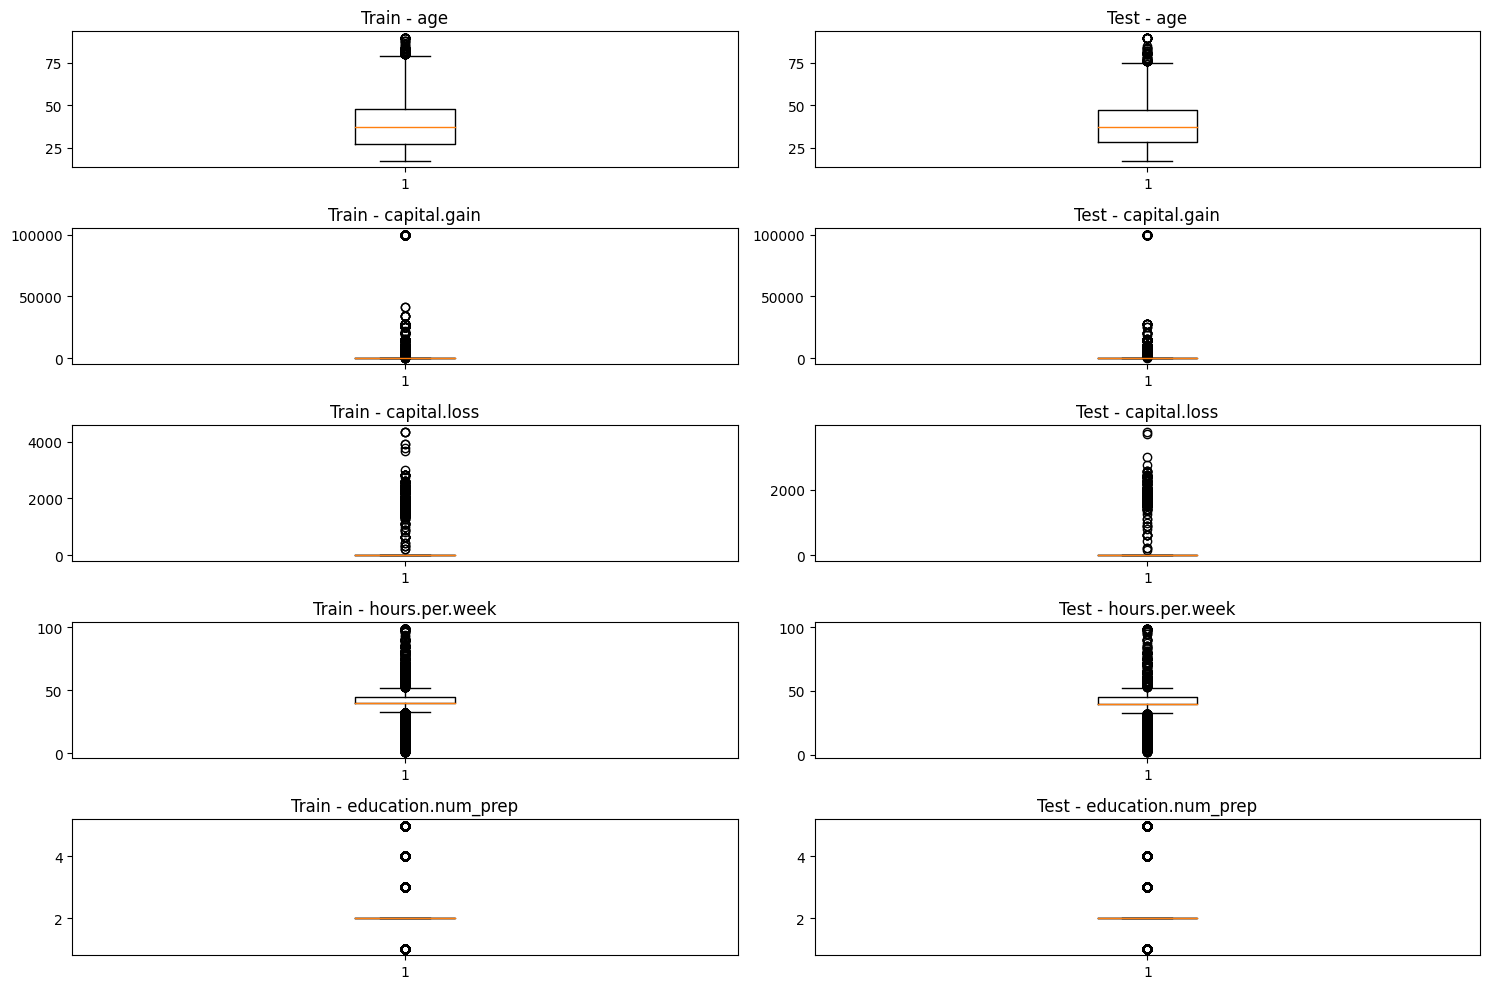

In [ ]:
# 박스플롯 그리기
plt.figure(figsize=(15, 10))  # 전체 크기 설정

for i, col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols), 2, 2 * i + 1)  # 왼쪽에 train 데이터 박스플롯
    plt.boxplot(train_df[col].dropna())
    plt.title(f'Train - {col}')

    plt.subplot(len(numerical_cols), 2, 2 * i + 2)  # 오른쪽에 test 데이터 박스플롯
    plt.boxplot(test_df[col].dropna())
    plt.title(f'Test - {col}')

plt.tight_layout()
plt.show()

In [ ]:
# IQR 벗어난 데이터 비율 계산 함수
def calculate_outlier_percentage(df, num_columns):
    outlier_percentages = {}

    for col in num_columns:
        # IQR 계산
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # 이상치 기준 설정
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # 이상치 계산
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_percentage = (len(outliers) / len(df)) * 100

        # 결과 저장
        outlier_percentages[col] = outlier_percentage

    return outlier_percentages

# IQR 벗어난 train 데이터 비율 계산 및 출력
outlier_percentages = calculate_outlier_percentage(train_df, numerical_cols)
for col, pct in outlier_percentages.items():
    print(f"{col}: {pct:.2f}% 이상의 데이터가 IQR을 벗어났습니다.")

age: 0.34% 이상의 데이터가 IQR을 벗어났습니다.
capital.gain: 8.28% 이상의 데이터가 IQR을 벗어났습니다.
capital.loss: 4.69% 이상의 데이터가 IQR을 벗어났습니다.
hours.per.week: 28.11% 이상의 데이터가 IQR을 벗어났습니다.
education.num_prep: 37.95% 이상의 데이터가 IQR을 벗어났습니다.


In [ ]:
# IQR 벗어난 test 데이터 비율 계산 및 출력
outlier_percentages = calculate_outlier_percentage(test_df, numerical_cols)
for col, pct in outlier_percentages.items():
    print(f"{col}: {pct:.2f}% 이상의 데이터가 IQR을 벗어났습니다.")

age: 0.74% 이상의 데이터가 IQR을 벗어났습니다.
capital.gain: 8.49% 이상의 데이터가 IQR을 벗어났습니다.
capital.loss: 4.57% 이상의 데이터가 IQR을 벗어났습니다.
hours.per.week: 26.19% 이상의 데이터가 IQR을 벗어났습니다.
education.num_prep: 37.48% 이상의 데이터가 IQR을 벗어났습니다.


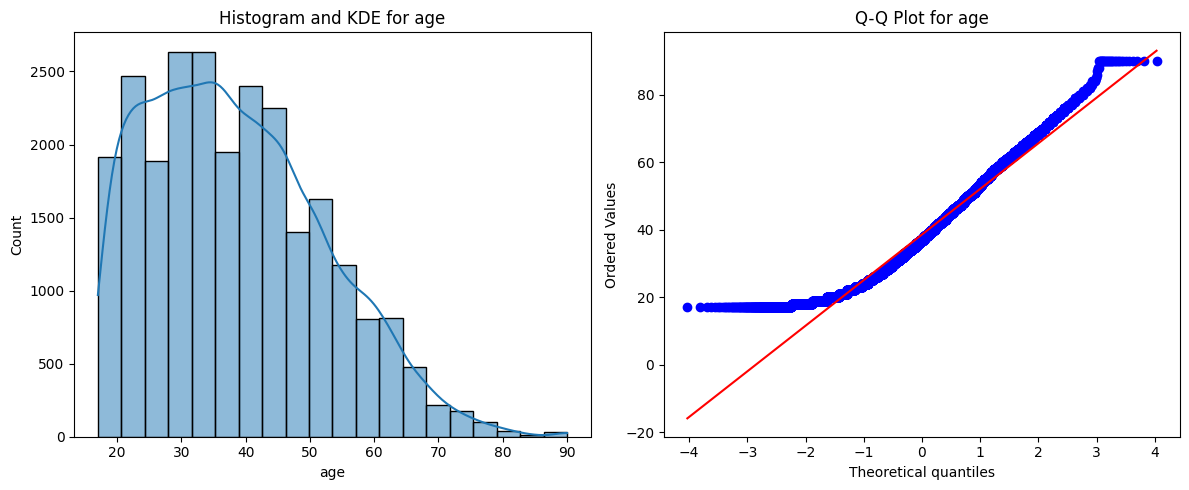

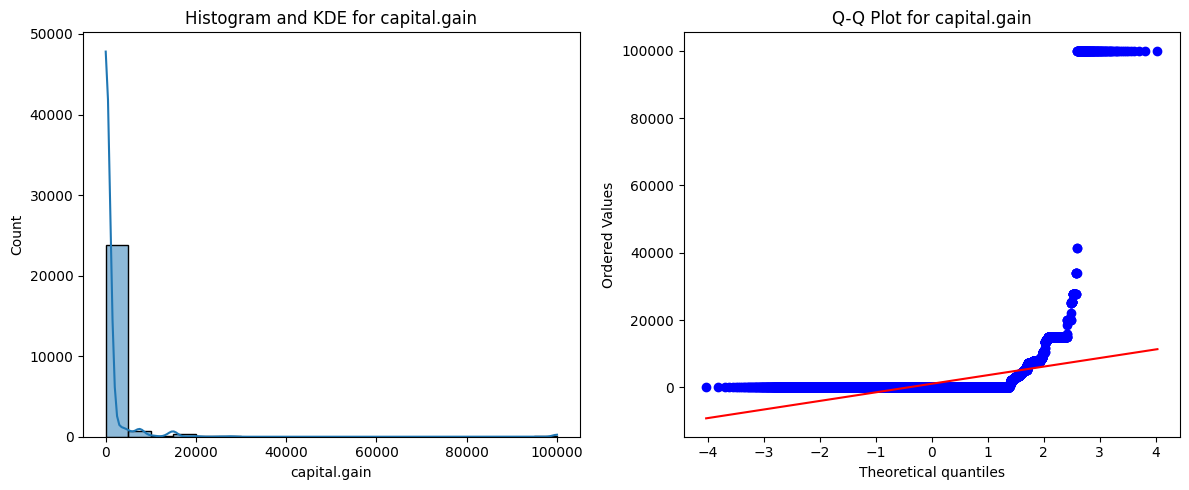

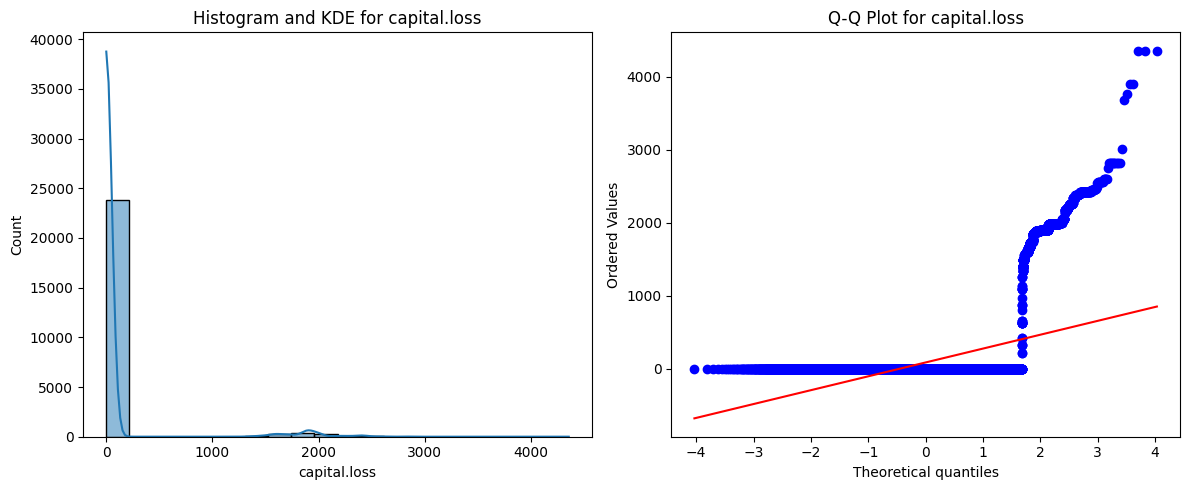

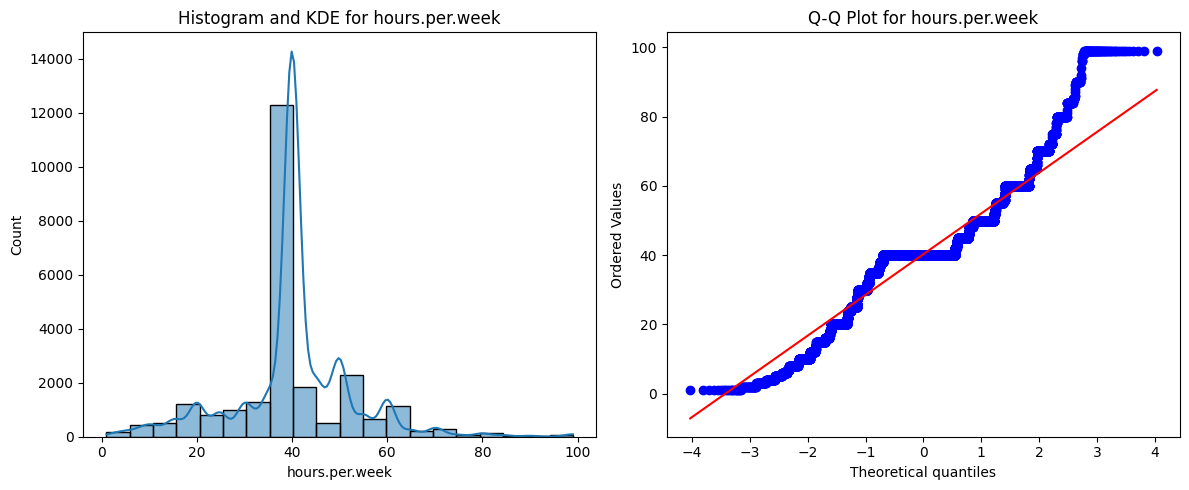

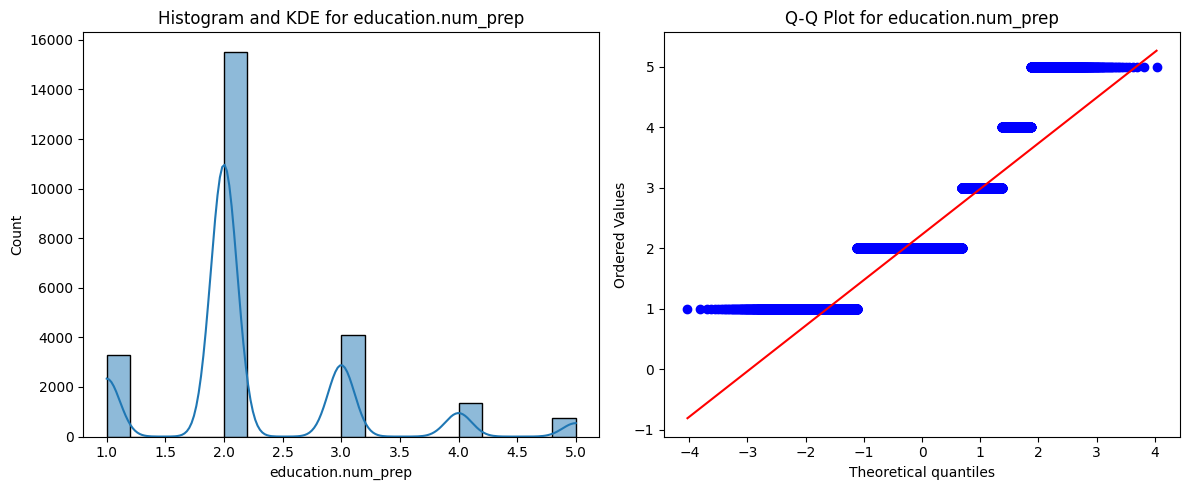

In [ ]:
#수치형 변수들이 정규분포를 따르는지 확인
# 시각화 함수
def visualize_distribution(df, num_columns):
    for col in num_columns:
        plt.figure(figsize=(12, 5))

        # 히스토그램과 커널 밀도 추정 (KDE) 시각화
        plt.subplot(1, 2, 1)
        sns.histplot(df[col], kde=True, bins=20)
        plt.title(f'Histogram and KDE for {col}')

        # Q-Q 플롯 시각화
        plt.subplot(1, 2, 2)
        stats.probplot(df[col], dist="norm", plot=plt)
        plt.title(f'Q-Q Plot for {col}')

        plt.tight_layout()


        plt.show();


# 수치형 변수에 대한 분포 시각화
visualize_distribution(train_df, numerical_cols)

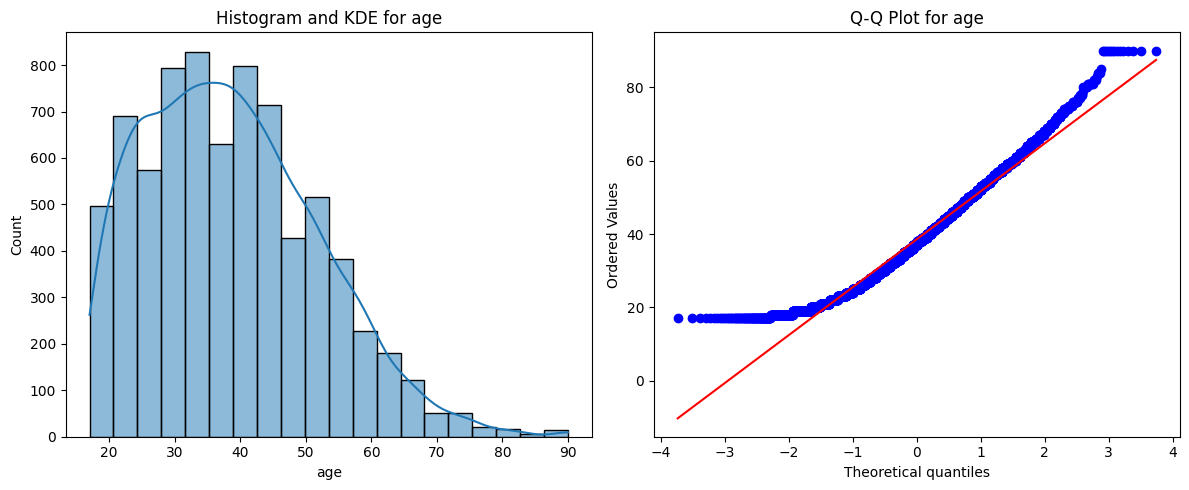

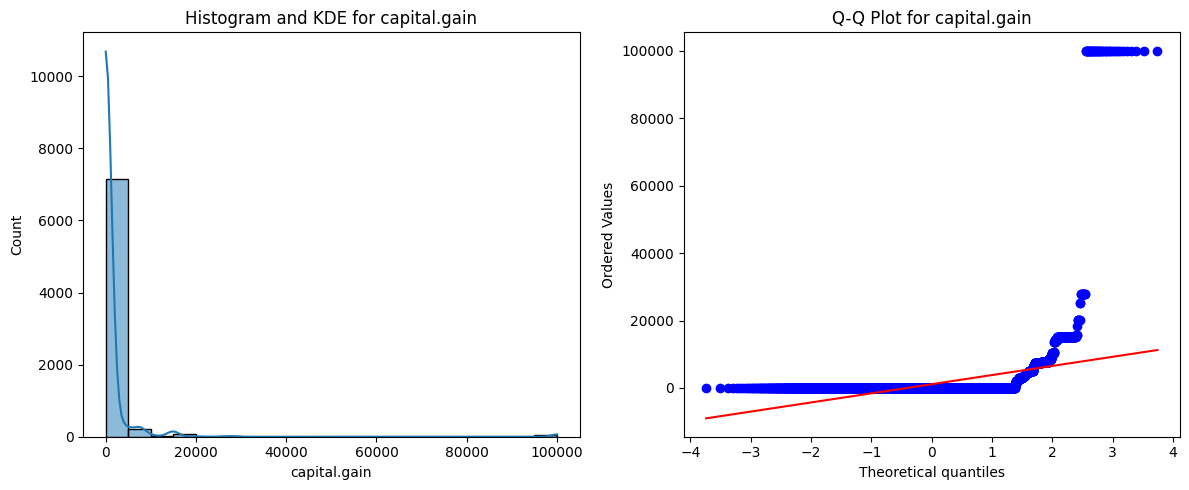

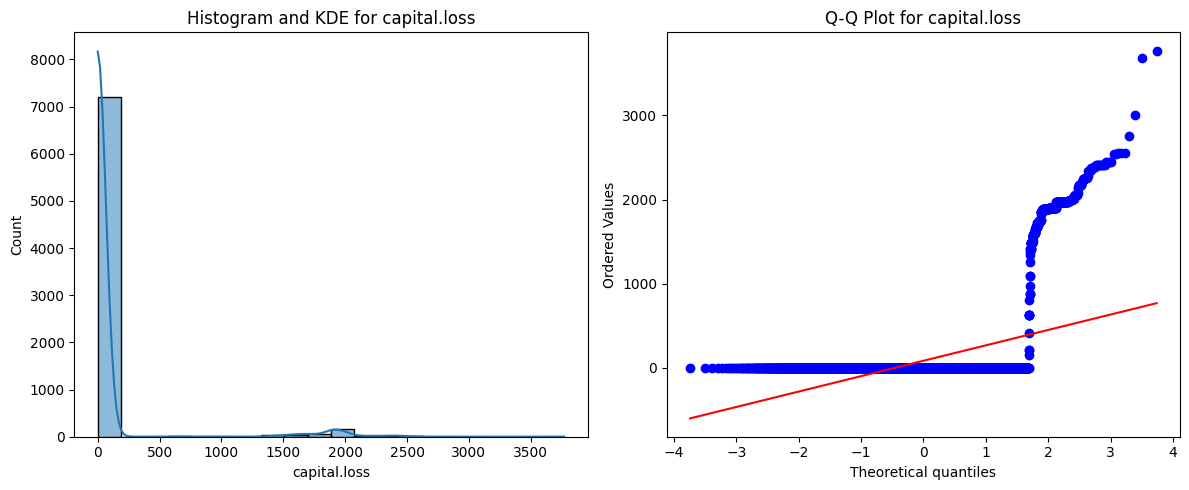

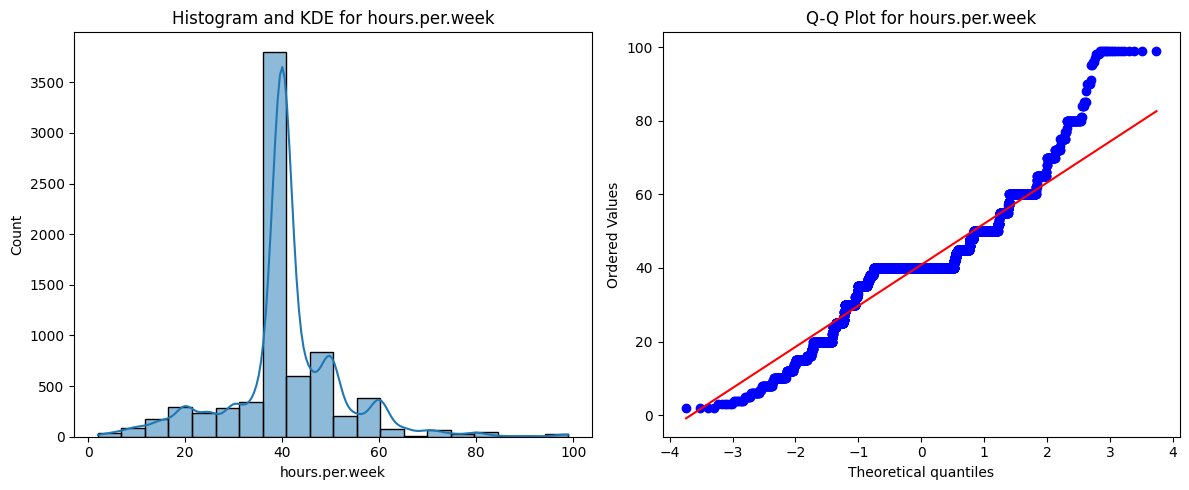

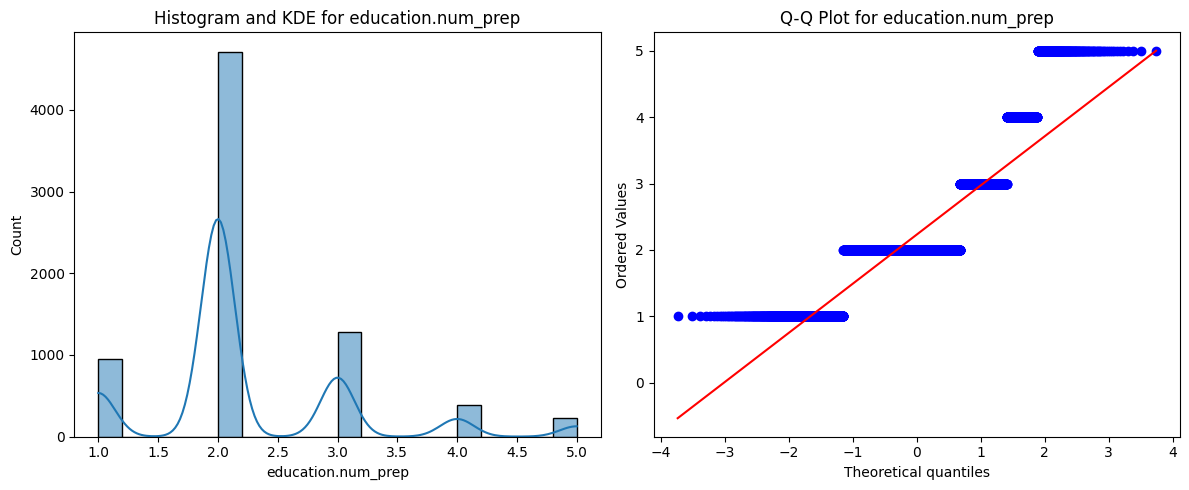

In [ ]:
visualize_distribution(test_df, numerical_cols)

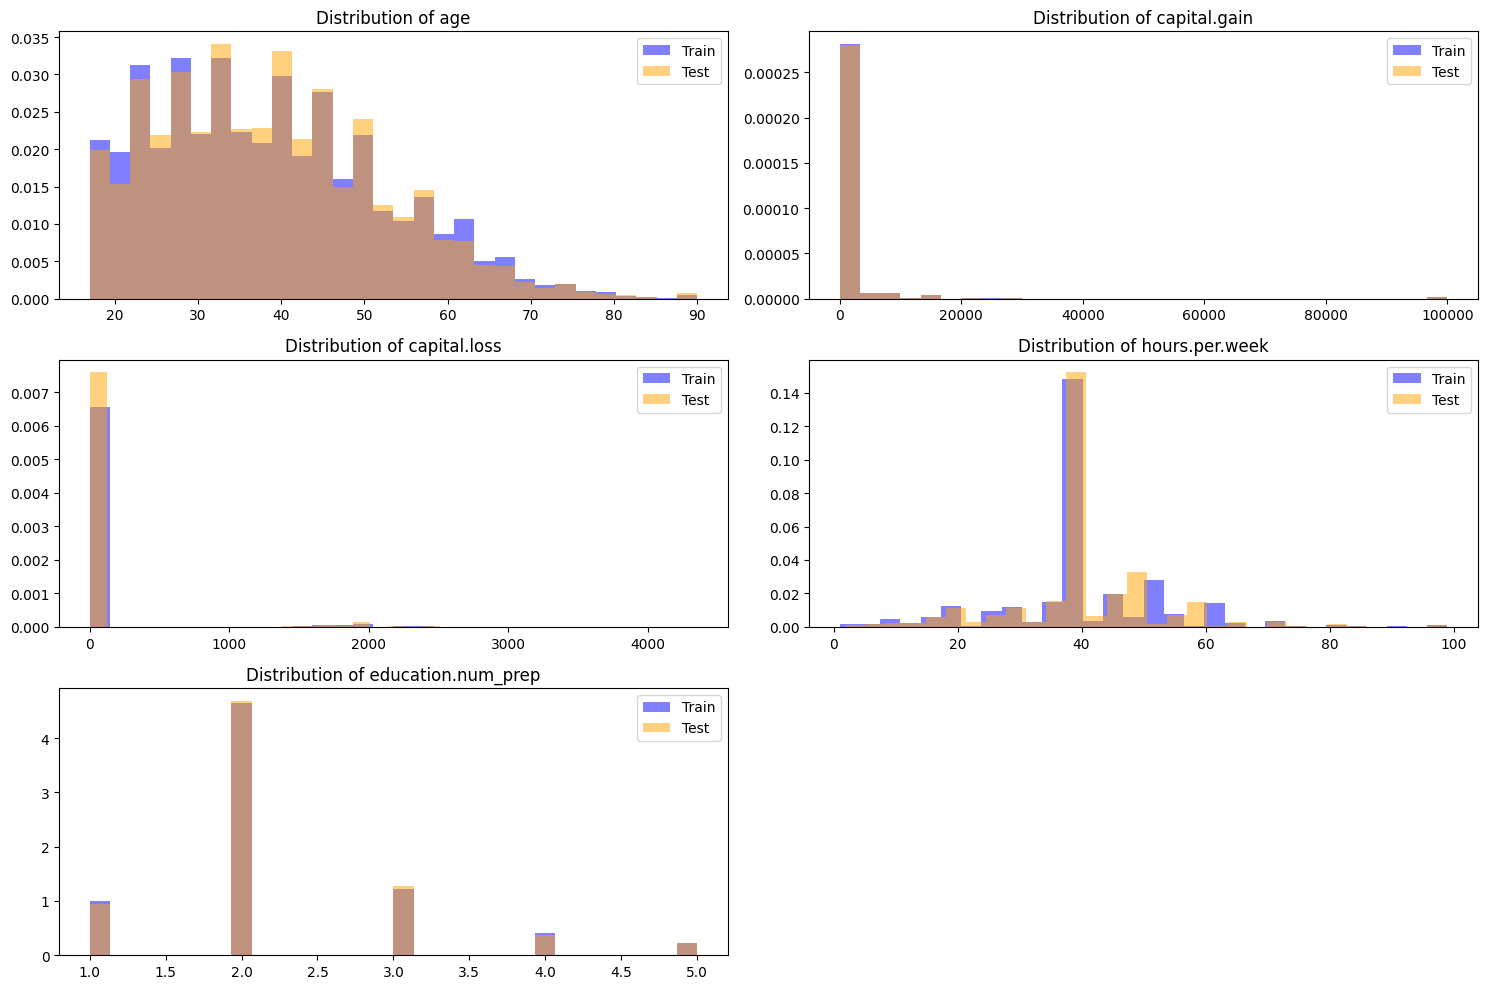

In [ ]:
# 시각화하기
plt.figure(figsize=(15, 10))  # 전체 그래프 크기 설정

for i, col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols) // 2 + 1, 2, i + 1)  # 2열로 서브플롯 구성
    plt.hist(train_df[col].dropna(), bins=30, alpha=0.5, label='Train', color='blue', density=True)
    plt.hist(test_df[col].dropna(), bins=30, alpha=0.5, label='Test', color='orange', density=True)

    plt.title(f'Distribution of {col}')
    plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

In [ ]:
# 시각화 결과 대체적으로 정규분포를 따르지 않는 것 같지만 한 번 더 확인 작업을 해준다

In [ ]:
#Kolmogorov-Smirnov 검정


from scipy.stats import kstest

for col in numerical_cols:
    stat, p = kstest(train_df[col], 'norm')
    print(f'K-S Test for {col}: p-value = {p}')
    if p > 0.05:
        print(f'{col} is likely normally distributed.')
    else:
        print(f'{col} is not normally distributed.')
    print()

K-S Test for age: p-value = 0.0
age is not normally distributed.

K-S Test for capital.gain: p-value = 0.0
capital.gain is not normally distributed.

K-S Test for capital.loss: p-value = 0.0
capital.loss is not normally distributed.

K-S Test for hours.per.week: p-value = 0.0
hours.per.week is not normally distributed.

K-S Test for education.num_prep: p-value = 0.0
education.num_prep is not normally distributed.



In [ ]:
# 수치형 변수들이 정규분포를 따르지 않음을 확인했다. 따라서 iqr 방법을 사용하기 전에 box-cox 변환을 해주어야 한다

In [ ]:
train_df_box_cox = train_df.copy()

In [ ]:
#box cox 변환을 사용하기 위해 수치형 변수에 전부 1을 추가 (0일 경우에는 box cox 변환 사용 불가)
train_df_box_cox[numerical_cols]  = train_df_box_cox[numerical_cols] + 1

In [ ]:
# Box-Cox 변환 적용
for col in numerical_cols:
    # Box-Cox 변환은 각 열에 대해 개별적으로 적용
    train_df_box_cox[col], best_lambda = stats.boxcox(train_df_box_cox[col])
    print(f"Best lambda for {col}: {best_lambda}")

Best lambda for age: 0.1456345924403319
Best lambda for capital.gain: -1.3697371868126318
Best lambda for capital.loss: -2.8357731765245275
Best lambda for hours.per.week: 1.0105243319522932
Best lambda for education.num_prep: -0.324611285653452


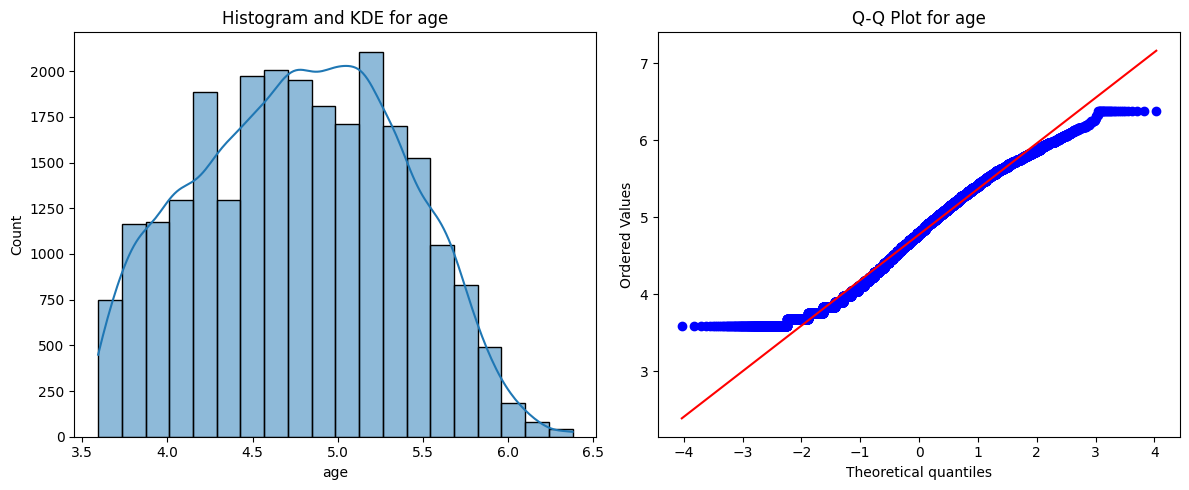

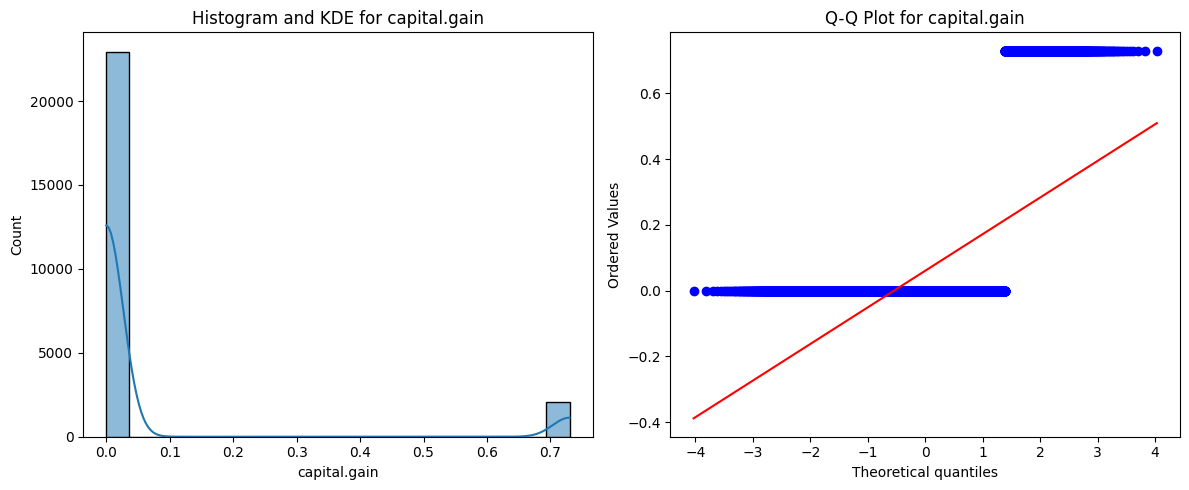

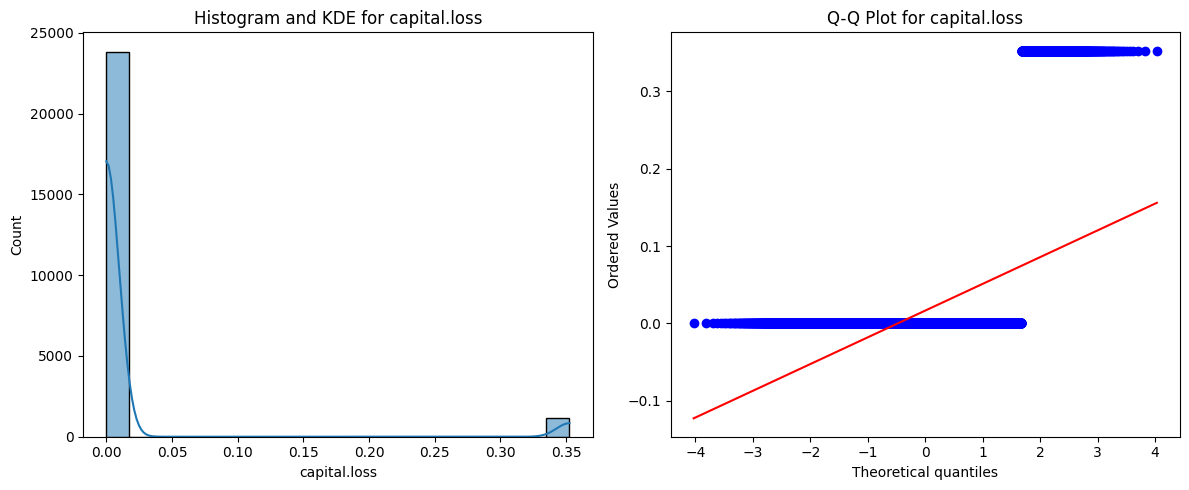

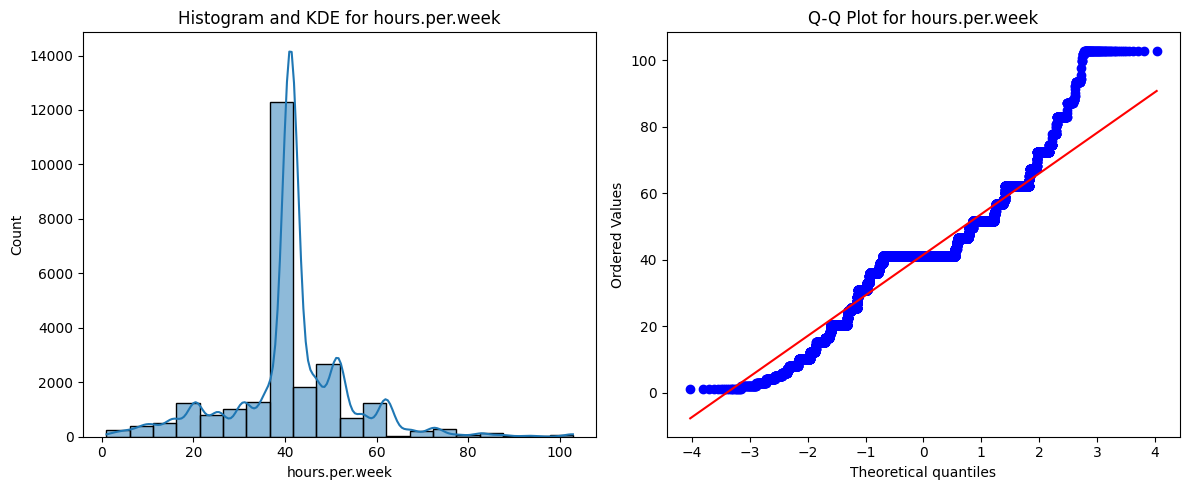

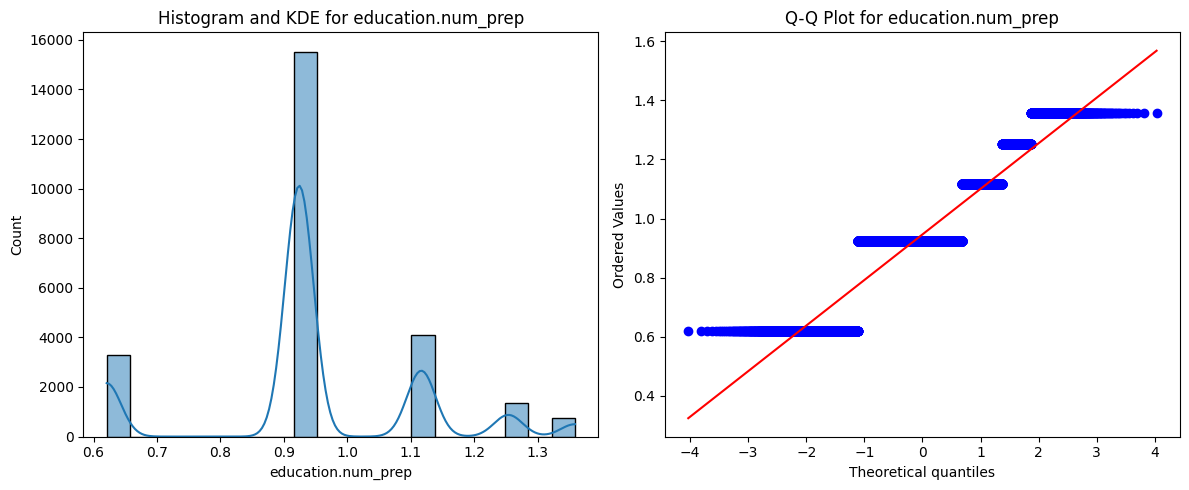

In [ ]:
#box-cox 변환 후 시각화
visualize_distribution(train_df_box_cox, numerical_cols)

In [ ]:
#box-cox 변환 후 정규분포 여부 확인
for col in numerical_cols:
    stat, p = kstest(train_df_box_cox[col], 'norm')
    print(f'K-S Test for {col}: p-value = {p}')
    if p > 0.05:
        print(f'{col} is likely normally distributed.')
    else:
        print(f'{col} is not normally distributed.')
    print()

K-S Test for age: p-value = 0.0
age is not normally distributed.

K-S Test for capital.gain: p-value = 0.0
capital.gain is not normally distributed.

K-S Test for capital.loss: p-value = 0.0
capital.loss is not normally distributed.

K-S Test for hours.per.week: p-value = 0.0
hours.per.week is not normally distributed.

K-S Test for education.num_prep: p-value = 0.0
education.num_prep is not normally distributed.



In [ ]:
#Kolmogorov-Smirnov 검정 결과 box-cox 변환 후에도 정규성을 따르지 않음

In [ ]:
train_df_box_cox[numerical_cols].head()

,age,capital.gain,capital.loss,hours.per.week,education.num_prep
0,4.967640,0.000000,0.0,46.403008,1.116339
1,3.831345,0.000000,0.0,41.200515,0.924068
2,5.985190,0.000000,0.0,38.082176,0.924068
3,5.505832,0.730064,0.0,51.611467,0.924068
4,5.408794,0.000000,0.0,41.200515,0.620701


In [ ]:
#Anderson-Darling 검정
from scipy.stats import anderson

for col in numerical_cols:
  data = train_df_box_cox[col]

  result = anderson(data)
  for cv, sl in zip(result.critical_values, result.significance_level):
      if result.statistic > cv:
          print(f"{col}은 {sl}% 유의 수준에서 정규성을 따르지 않습니다.")
      else:
          print(f"{col}은 {sl}% 유의 수준에서 정규성을 따릅니다.")
      print()

age은 15.0% 유의 수준에서 정규성을 따르지 않습니다.

age은 10.0% 유의 수준에서 정규성을 따르지 않습니다.

age은 5.0% 유의 수준에서 정규성을 따르지 않습니다.

age은 2.5% 유의 수준에서 정규성을 따르지 않습니다.

age은 1.0% 유의 수준에서 정규성을 따르지 않습니다.

capital.gain은 15.0% 유의 수준에서 정규성을 따르지 않습니다.

capital.gain은 10.0% 유의 수준에서 정규성을 따르지 않습니다.

capital.gain은 5.0% 유의 수준에서 정규성을 따르지 않습니다.

capital.gain은 2.5% 유의 수준에서 정규성을 따르지 않습니다.

capital.gain은 1.0% 유의 수준에서 정규성을 따르지 않습니다.

capital.loss은 15.0% 유의 수준에서 정규성을 따르지 않습니다.

capital.loss은 10.0% 유의 수준에서 정규성을 따르지 않습니다.

capital.loss은 5.0% 유의 수준에서 정규성을 따르지 않습니다.

capital.loss은 2.5% 유의 수준에서 정규성을 따르지 않습니다.

capital.loss은 1.0% 유의 수준에서 정규성을 따르지 않습니다.

hours.per.week은 15.0% 유의 수준에서 정규성을 따르지 않습니다.

hours.per.week은 10.0% 유의 수준에서 정규성을 따르지 않습니다.

hours.per.week은 5.0% 유의 수준에서 정규성을 따르지 않습니다.

hours.per.week은 2.5% 유의 수준에서 정규성을 따르지 않습니다.

hours.per.week은 1.0% 유의 수준에서 정규성을 따르지 않습니다.

education.num_prep은 15.0% 유의 수준에서 정규성을 따르지 않습니다.

education.num_prep은 10.0% 유의 수준에서 정규성을 따르지 않습니다.

education.num_prep은 5.0% 유의 수준에서 정규성을 따르지 않습니다.

education.num_prep

In [ ]:
#Anderson-Darling 검정 후에도 정규성을 따르지 않는 것을 확인되었다. 따라서 데이터의 본질이 정규분포가 아님으로 iqr 방법을 사용해서는 안 된다.
# 다양한 데이터 형태에 적용 가능하고 강건한 이상치 탐지 모델인 isolation forest 사용

In [ ]:
import pandas as pd
from sklearn.ensemble import IsolationForest




# Isolation Forest 모델 학습 및 이상치 탐지
iso_forest = IsolationForest(contamination=0.1)  # 이상치 비율을 1%로 설정 (필요에 따라 조정)
outliers_train = iso_forest.fit_predict(train_df[numerical_cols])
outliers_test = iso_forest.fit_predict(test_df[numerical_cols])

# 이상치가 -1로 표시된 데이터를 찾음
train_df['outlier'] = outliers_train
test_df['outlier'] = outliers_test

# 이상치를 중앙값으로 대체하는 함수 정의
def impute_outliers_with_median(df, columns):
    for col in columns:
        median_value = df[col].median()
        # 이상치가 감지된 값들을 중앙값으로 대체
        df.loc[df['outlier'] == -1, col] = median_value
    return df

# Train 및 Test 데이터의 이상치를 중앙값으로 대체
train_cleaned = impute_outliers_with_median(train_df, numerical_cols)
test_cleaned = impute_outliers_with_median(test_df, numerical_cols)

# 'outlier' 열 삭제
train_df_cleaned = train_cleaned.drop('outlier', axis=1)
test_df_cleaned = test_cleaned.drop('outlier', axis=1)


<ipython-input-91-533318014f21>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['outlier'] = outliers_train
<ipython-input-91-533318014f21>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['outlier'] = outliers_test


In [ ]:
#라벨인코딩

from sklearn.preprocessing import LabelEncoder

# LabelEncoder 객체 생성
label_encoder = LabelEncoder()

for col in categorical_cols:
      train_df_cleaned[col] = label_encoder.fit_transform(train_df[col])
      test_df_cleaned[col] = label_encoder.fit_transform(test_df[col])


In [ ]:
train_df_cleaned.head()

,age,capital.gain,capital.loss,hours.per.week,income,workclass,marital.status,occupation,relationship,race,sex,native.country,education.num_prep
0,41,0,0,45,0,3,0,2,3,2,0,1,3
1,20,0,0,40,0,3,1,6,2,2,0,0,2
2,73,0,0,37,0,3,4,6,3,2,0,1,2
3,56,7688,0,50,1,4,2,2,1,2,1,1,2
4,53,0,0,40,0,3,2,5,1,2,1,1,1


In [ ]:
test_df_cleaned.head()

,age,capital.gain,capital.loss,hours.per.week,income,workclass,marital.status,occupation,relationship,race,sex,native.country,education.num_prep
25020,37.0,0.0,0.0,40.0,0.0,0,0,0,3,1,1,27,2
25021,22.0,0.0,0.0,40.0,0.0,4,1,4,2,4,1,36,2
25022,39.0,0.0,0.0,40.0,0.0,2,1,0,2,4,0,36,3
25023,35.0,0.0,0.0,40.0,1.0,2,1,9,3,1,1,17,5
25024,40.0,0.0,0.0,40.0,1.0,2,2,11,1,4,1,36,3


In [ ]:
#스케일링 전 income 열 제거
encoded_train_df_no_income = train_df_cleaned.drop('income', axis=1)
encoded_test_df_no_income = test_df_cleaned.drop('income', axis=1)

In [ ]:
#다중공선성 확인 과정
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

# 스케일링
scaler = StandardScaler()
train_df_scaled = pd.DataFrame(scaler.fit_transform(encoded_train_df_no_income), columns=encoded_train_df_no_income.columns)


train_df_scaled.head()


,age,capital.gain,capital.loss,hours.per.week,workclass,marital.status,occupation,relationship,race,sex,native.country,education.num_prep
0,0.295809,-0.198399,-0.083221,0.487617,0.094818,-1.678966,-0.674621,1.206044,0.305848,-1.403346,-0.254071,1.183004
1,-1.430776,-0.198399,-0.083221,0.003364,0.094818,-0.562897,0.456396,0.158766,0.305848,-1.403346,-2.109006,-0.208242
2,2.926795,-0.198399,-0.083221,-0.287188,0.094818,2.785312,0.456396,1.206044,0.305848,-1.403346,-0.254071,-0.208242
3,1.529083,5.227793,-0.083221,0.971870,0.828605,0.553173,-0.674621,-0.888512,0.305848,0.712583,-0.254071,-0.208242
4,1.282428,-0.198399,-0.083221,0.003364,0.094818,0.553173,0.173642,-0.888512,0.305848,0.712583,-0.254071,-1.599489


In [ ]:

test_df_scaled = pd.DataFrame(scaler.fit_transform(encoded_test_df_no_income), columns=encoded_test_df_no_income.columns)


In [ ]:
test_df_scaled.head()

,age,capital.gain,capital.loss,hours.per.week,workclass,marital.status,occupation,relationship,race,sex,native.country,education.num_prep
0,-0.048166,-0.216837,-0.080032,-0.064967,-2.31021,-1.717641,-1.474394,1.211971,-3.169598,0.671795,-1.290286,-0.215829
1,-1.329222,-0.216837,-0.080032,-0.064967,1.88365,-0.575727,-0.482808,0.163866,0.384065,0.671795,0.263897,-0.215829
2,0.122641,-0.216837,-0.080032,-0.064967,-0.21328,-0.575727,-1.474394,0.163866,0.384065,-1.488549,0.263897,1.211860
3,-0.218974,-0.216837,-0.080032,-0.064967,-0.21328,-0.575727,0.756674,1.211971,-3.169598,0.671795,-3.017156,4.067237
4,0.208045,-0.216837,-0.080032,-0.064967,-0.21328,0.566187,1.252467,-0.884238,0.384065,0.671795,0.263897,1.211860


In [ ]:
# Step 2: VIF 계산
vif_data = pd.DataFrame()
vif_data["Feature"] = train_df_scaled.columns
vif_data["VIF"] = [variance_inflation_factor(train_df_scaled, i) for i in range(train_df_scaled.shape[1])]

# 결과 출력
print(vif_data)

               Feature       VIF
0                  age  1.093149
1         capital.gain  1.012964
2         capital.loss  1.001265
3       hours.per.week  1.098858
4            workclass  1.063837
5       marital.status  1.270407
6           occupation  1.055777
7         relationship  1.395985
8                 race  1.114726
9                  sex  1.244821
10      native.country  1.113366
11  education.num_prep  1.039365


In [ ]:
multicollinear_features = vif_data[vif_data["VIF"] > 10]
print("다중공선성이 있는 변수들:")
print(multicollinear_features)

다중공선성이 있는 변수들:
Empty DataFrame
Columns: [Feature, VIF]
Index: []


In [ ]:
#모든 변수에서 다중공선성이 확인되지 않았다

In [ ]:
train_df_scaled.head()

,age,capital.gain,capital.loss,hours.per.week,workclass,marital.status,occupation,relationship,race,sex,native.country,education.num_prep
0,0.295809,-0.198399,-0.083221,0.487617,0.094818,-1.678966,-0.674621,1.206044,0.305848,-1.403346,-0.254071,1.183004
1,-1.430776,-0.198399,-0.083221,0.003364,0.094818,-0.562897,0.456396,0.158766,0.305848,-1.403346,-2.109006,-0.208242
2,2.926795,-0.198399,-0.083221,-0.287188,0.094818,2.785312,0.456396,1.206044,0.305848,-1.403346,-0.254071,-0.208242
3,1.529083,5.227793,-0.083221,0.971870,0.828605,0.553173,-0.674621,-0.888512,0.305848,0.712583,-0.254071,-0.208242
4,1.282428,-0.198399,-0.083221,0.003364,0.094818,0.553173,0.173642,-0.888512,0.305848,0.712583,-0.254071,-1.599489


In [ ]:
final_train_df = train_df_scaled.copy()


In [ ]:
final_train_df.columns

Index(['age', 'capital.gain', 'capital.loss', 'hours.per.week', 'workclass',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'native.country', 'education.num_prep'],
      dtype='object')

In [ ]:
# income 열 추가
final_train_df = final_train_df.merge(train_df[['income']], left_index=True, right_index=True)

In [ ]:
final_train_df.head()

,age,capital.gain,capital.loss,hours.per.week,workclass,marital.status,occupation,relationship,race,sex,native.country,education.num_prep,income
0,0.295809,-0.198399,-0.083221,0.487617,0.094818,-1.678966,-0.674621,1.206044,0.305848,-1.403346,-0.254071,1.183004,0
1,-1.430776,-0.198399,-0.083221,0.003364,0.094818,-0.562897,0.456396,0.158766,0.305848,-1.403346,-2.109006,-0.208242,0
2,2.926795,-0.198399,-0.083221,-0.287188,0.094818,2.785312,0.456396,1.206044,0.305848,-1.403346,-0.254071,-0.208242,0
3,1.529083,5.227793,-0.083221,0.971870,0.828605,0.553173,-0.674621,-0.888512,0.305848,0.712583,-0.254071,-0.208242,1
4,1.282428,-0.198399,-0.083221,0.003364,0.094818,0.553173,0.173642,-0.888512,0.305848,0.712583,-0.254071,-1.599489,0


In [ ]:
final_test_df = test_df_scaled.copy()

In [ ]:
final_test_df.columns

Index(['age', 'capital.gain', 'capital.loss', 'hours.per.week', 'workclass',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'native.country', 'education.num_prep'],
      dtype='object')

In [ ]:
final_test_df.head()

,age,capital.gain,capital.loss,hours.per.week,workclass,marital.status,occupation,relationship,race,sex,native.country,education.num_prep
0,-0.048166,-0.216837,-0.080032,-0.064967,-2.31021,-1.717641,-1.474394,1.211971,-3.169598,0.671795,-1.290286,-0.215829
1,-1.329222,-0.216837,-0.080032,-0.064967,1.88365,-0.575727,-0.482808,0.163866,0.384065,0.671795,0.263897,-0.215829
2,0.122641,-0.216837,-0.080032,-0.064967,-0.21328,-0.575727,-1.474394,0.163866,0.384065,-1.488549,0.263897,1.211860
3,-0.218974,-0.216837,-0.080032,-0.064967,-0.21328,-0.575727,0.756674,1.211971,-3.169598,0.671795,-3.017156,4.067237
4,0.208045,-0.216837,-0.080032,-0.064967,-0.21328,0.566187,1.252467,-0.884238,0.384065,0.671795,0.263897,1.211860


In [ ]:
test_df['income']

,income
25020,0.0
25021,0.0
25022,0.0
25023,1.0
25024,1.0
...,...
32556,0.0
32557,1.0
32558,1.0
32559,0.0


In [ ]:
#테스트 데이터 인덱스 초기화
test_df_reset = test_df.reset_index(drop=True)

In [ ]:
test_df_reset.head()

,age,capital.gain,capital.loss,hours.per.week,income,workclass,marital.status,occupation,relationship,race,sex,native.country,education.num_prep,outlier
0,37.0,0.0,0.0,40.0,0.0,Federal-gov,Divorced,Adm-clerical,Unmarried,Asian-Pac-Islander,Male,Philippines,2,-1
1,22.0,0.0,0.0,40.0,0.0,Self-emp-not-inc,Never-married,Farming-fishing,Spouse (Yes kid),White,Male,United-States,2,1
2,39.0,0.0,0.0,40.0,0.0,Private,Never-married,Adm-clerical,Spouse (Yes kid),White,Female,United-States,3,1
3,35.0,0.0,0.0,40.0,1.0,Private,Never-married,Prof-specialty,Unmarried,Asian-Pac-Islander,Male,India,5,1
4,40.0,0.0,0.0,40.0,1.0,Private,Now Married,Sales,Spouse (No kid),White,Male,United-States,3,1


In [ ]:
# income 열 추가
final_test_df = final_test_df.merge(test_df_reset[['income']], left_index=True, right_index=True)

In [ ]:
train_df['income'].isnull().sum()

0

In [ ]:
final_train_df['income'].isnull().sum()

0

In [ ]:
final_test_df.head()

,age,capital.gain,capital.loss,hours.per.week,workclass,marital.status,occupation,relationship,race,sex,native.country,education.num_prep,income
0,-0.048166,-0.216837,-0.080032,-0.064967,-2.31021,-1.717641,-1.474394,1.211971,-3.169598,0.671795,-1.290286,-0.215829,0.0
1,-1.329222,-0.216837,-0.080032,-0.064967,1.88365,-0.575727,-0.482808,0.163866,0.384065,0.671795,0.263897,-0.215829,0.0
2,0.122641,-0.216837,-0.080032,-0.064967,-0.21328,-0.575727,-1.474394,0.163866,0.384065,-1.488549,0.263897,1.211860,0.0
3,-0.218974,-0.216837,-0.080032,-0.064967,-0.21328,-0.575727,0.756674,1.211971,-3.169598,0.671795,-3.017156,4.067237,1.0
4,0.208045,-0.216837,-0.080032,-0.064967,-0.21328,0.566187,1.252467,-0.884238,0.384065,0.671795,0.263897,1.211860,1.0


In [ ]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score



X_train = final_train_df.drop(columns='income')  # 피처
y_train = final_train_df['income']  # 타겟

X_test = final_test_df.drop(columns='income')  # 피처
y_test = final_test_df['income']  # 타겟



# LightGBM 분류 모델 초기화
model = lgb.LGBMClassifier(objective='binary')

# 하이퍼파라미터 그리드 설정
param_dist = {
    'num_leaves': [31, 50, 100],  # 리프 노드 수
    'learning_rate': [0.01, 0.05, 0.1],  # 학습률
    'n_estimators': [100, 200, 500],  # 트리 개수
    'min_child_samples': [10, 20, 30],  # 리프 노드 최소 샘플 수
    'subsample': [0.8, 0.9, 1.0],  # 샘플링 비율
    'colsample_bytree': [0.8, 0.9, 1.0]  # 각 트리에서 사용할 피처 비율
}

# RandomizedSearchCV로 하이퍼파라미터 튜닝
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=20, cv=5, verbose=1, random_state=42, n_jobs=-1)

# 모델 학습 및 하이퍼파라미터 최적화
random_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print("최적의 하이퍼파라미터: ", random_search.best_params_)




Fitting 5 folds for each of 20 candidates, totalling 100 fits
[LightGBM] [Info] Number of positive: 5943, number of negative: 19077
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002170 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 285
[LightGBM] [Info] Number of data points in the train set: 25020, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.237530 -> initscore=-1.166269
[LightGBM] [Info] Start training from score -1.166269
최적의 하이퍼파라미터:  {'subsample': 0.8, 'num_leaves': 31, 'n_estimators': 500, 'min_child_samples': 30, 'learning_rate': 0.01, 'colsample_bytree': 0.8}


In [ ]:
#최적의 하이퍼파라미터:  {'subsample': 0.8, 'num_leaves': 31, 'n_estimators': 500, 'min_child_samples': 30, 'learning_rate': 0.01, 'colsample_bytree': 0.8}

In [ ]:
# 최적의 모델로 예측
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

# 모델 성능 평가 (정확도)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8372
